In [ ]:
import os
os.chdir('..')
print(os.getcwd())

In [ ]:
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.plots import Plots
import gymnasium as gym
import pandas as pd
import numpy as np
import pickle

In [ ]:
%load_ext autoreload
%autoreload 2
from src.algorithms import vi_grid_search
from src.utils.plotting import create_param_heatmap, save_plot, create_v_iters_plot
from src.experiments.blackjack_exp import BlackjackExperiment
from src.utils.plotting import modified_plot_policy

# VI and PI Grid Search

In [ ]:
blackjack_exp = BlackjackExperiment(env_name='blackjack_200',
                                    result_dir='results',
                                    fig_dir='figs',
                                    random_seed =17)

params = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 0.99, 0.999, 1.0],
    'theta': [0.1, 0.01, 0.001, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14, 1e-16]
}

blackjack_exp.run_vi_pi_grid_search(params=params,
                                    test_iters=200,
                                    verbose=False,
                                    log_name='pi_vi_grid_search_200')

In [ ]:
blackjack_exp = BlackjackExperiment(env_name='blackjack_1000',
                                    result_dir='results',
                                    fig_dir='figs',
                                    random_seed =17)

params = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 0.99, 0.999, 1.0],
    'theta': [0.1, 0.01, 0.001, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14, 1e-16]
}

blackjack_exp.run_vi_pi_grid_search(params=params,
                                    test_iters=1000,
                                    verbose=False,
                                    log_name='pi_vi_grid_search_1000')

# Q Learning Grid Search

2024-11-26 01:01:45,289 - INFO - Running blackjack_200_less_combinations Experiment
2024-11-26 01:01:45,290 - INFO - Params: {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1.0], 'init_alpha': array([0.2, 0.4, 0.6, 0.8, 1. ]), 'init_epsilon': array([0.2, 0.4, 0.6, 0.8, 1. ]), 'n_episodes': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])}
2024-11-26 01:01:45,290 - INFO - Test Iters: 200
2024-11-26 01:01:45,291 - INFO - Running Q-Learning Grid Search
2024-11-26 01:23:03,241 - INFO - Best params: {'gamma': 0.7, 'init_alpha': 0.4, 'min_alpha': 0.01, 'alpha_decay_ratio': 0.5, 'init_epsilon': 0.8, 'min_epsilon': 0.1, 'epsilon_decay_ratio': 0.9, 'n_episodes': 3000}, Highest Avg. Reward: 0.19
2024-11-26 01:23:04,613 - INFO - Q-Learning Grid Search results saved to results/blackjack_200_less_combinations/q_learning_grid_search_results.pkl
2024-11-26 01:23:04,623 - INFO - ##################################################
2024-11-26 01:23

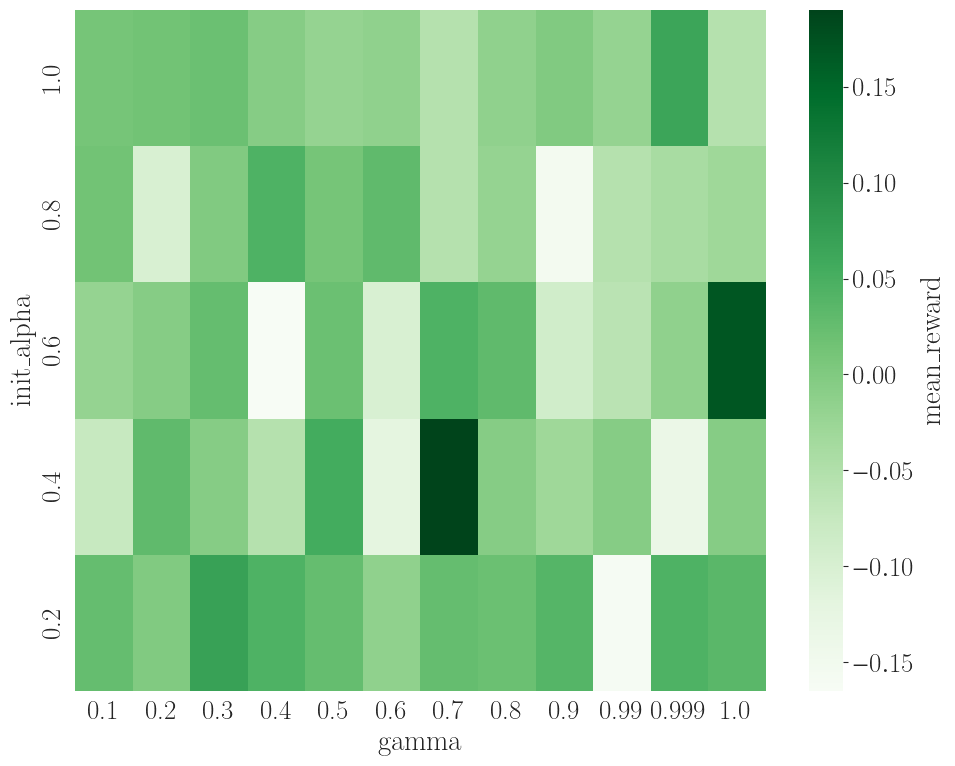

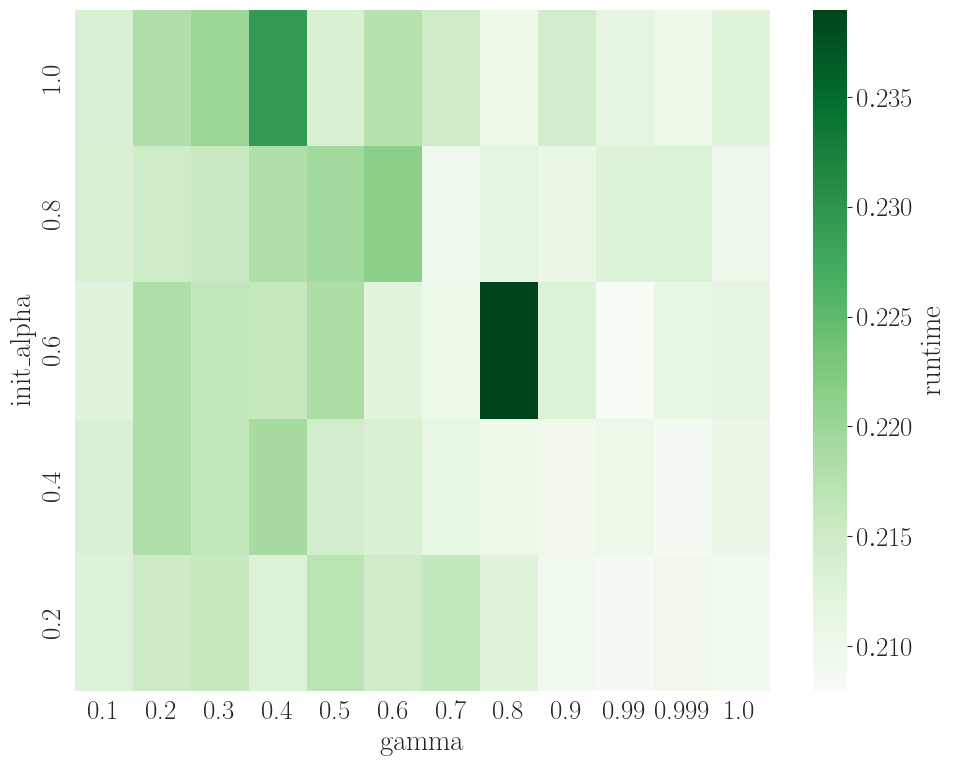

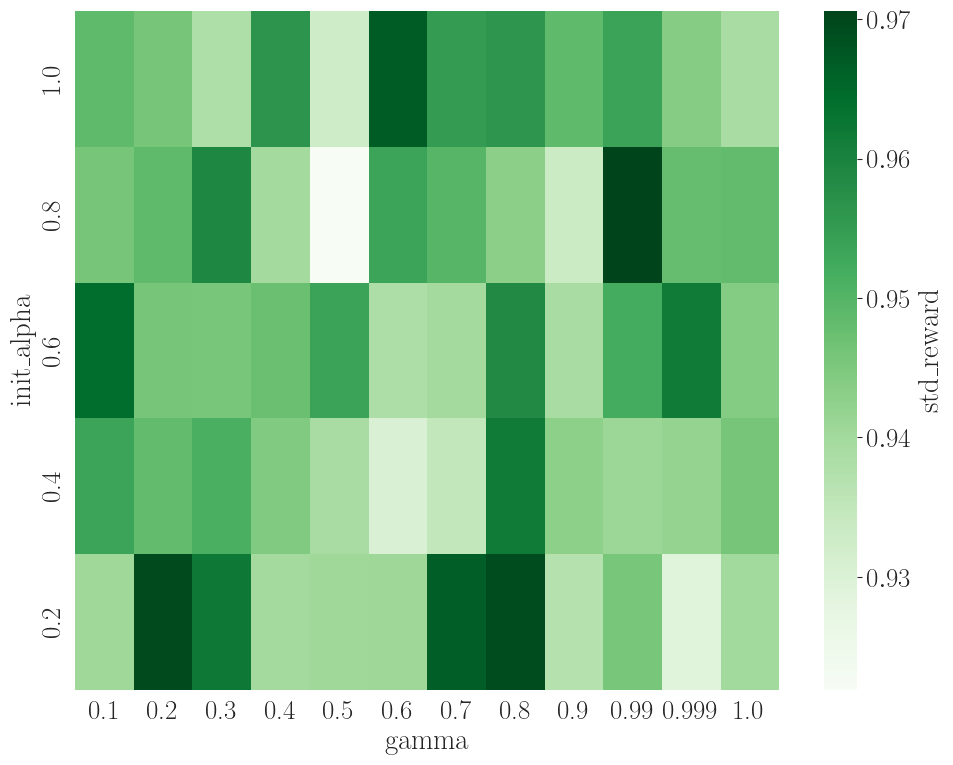

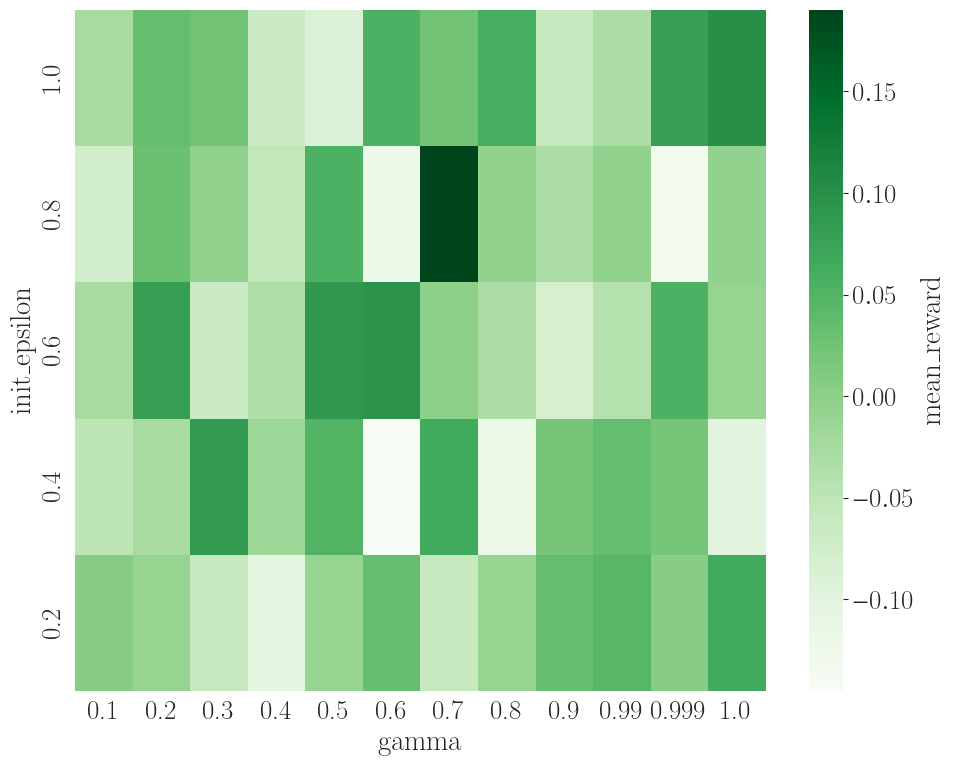

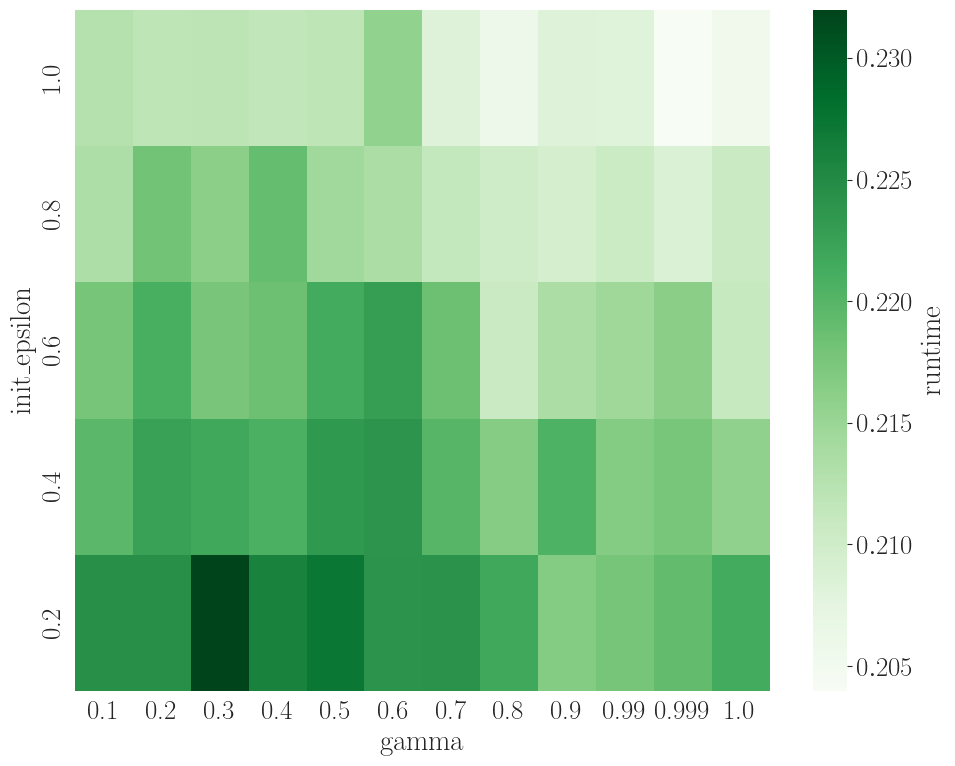

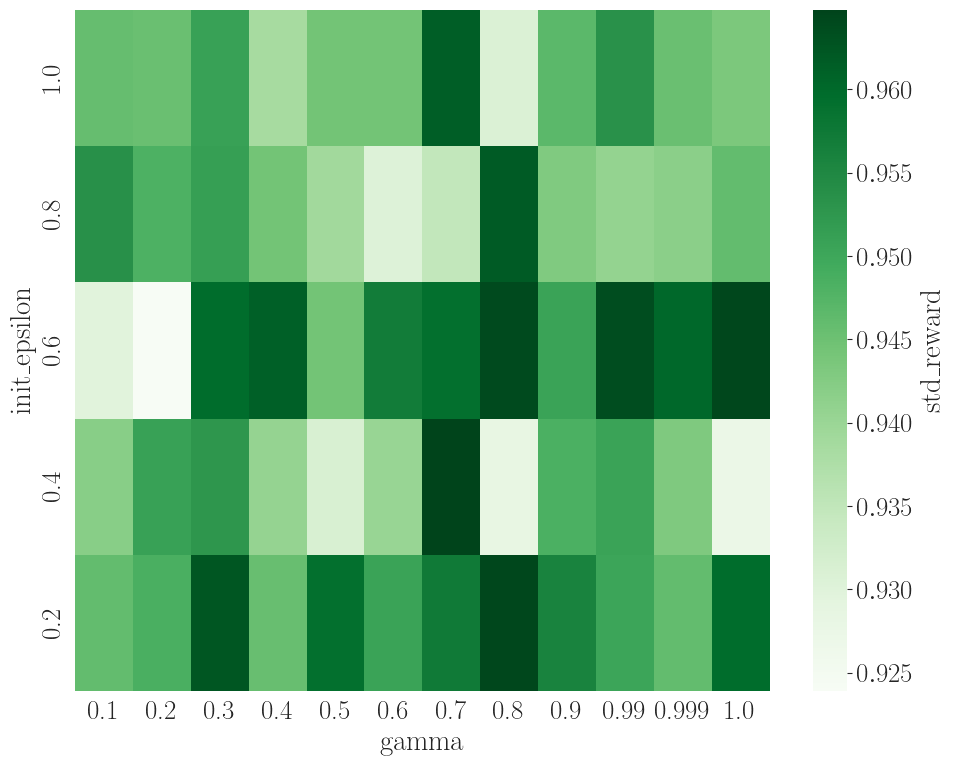

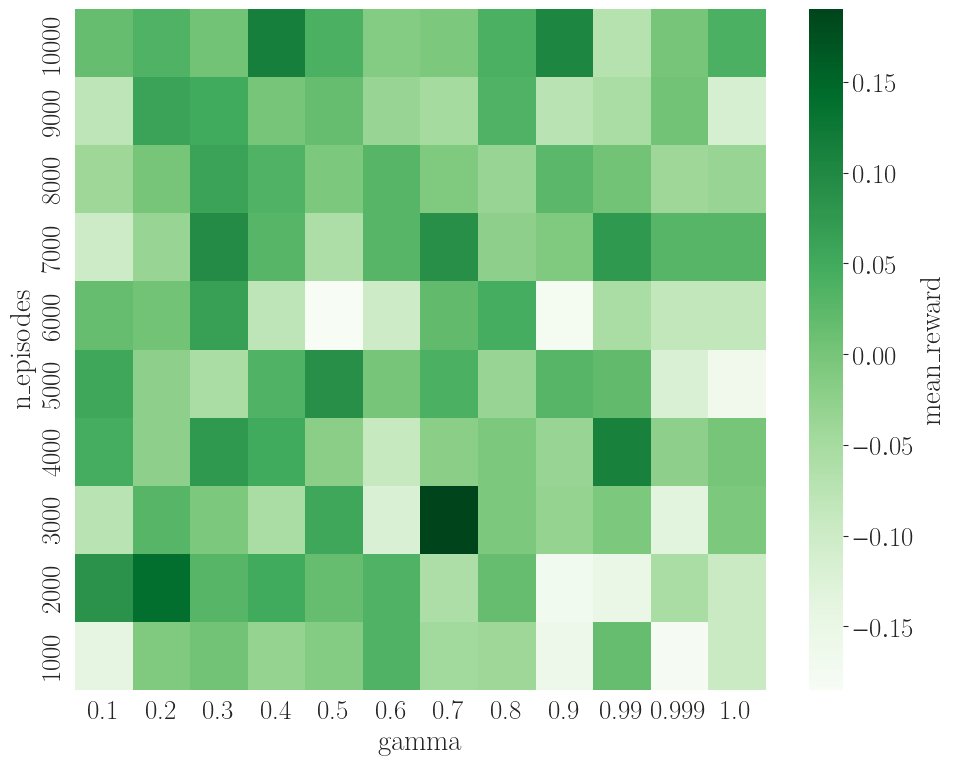

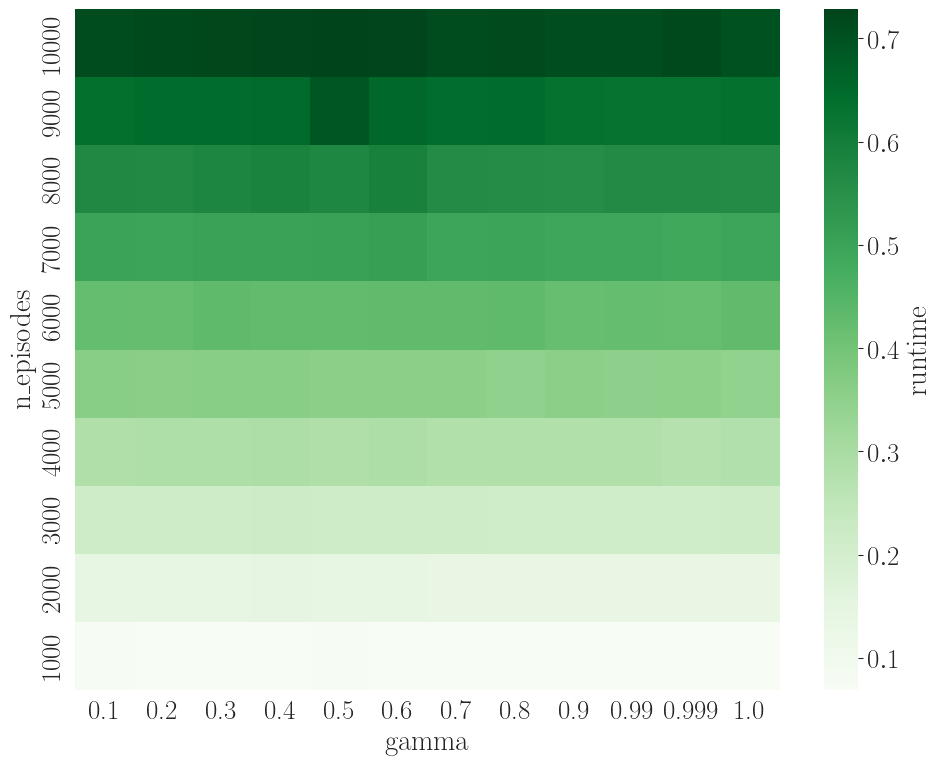

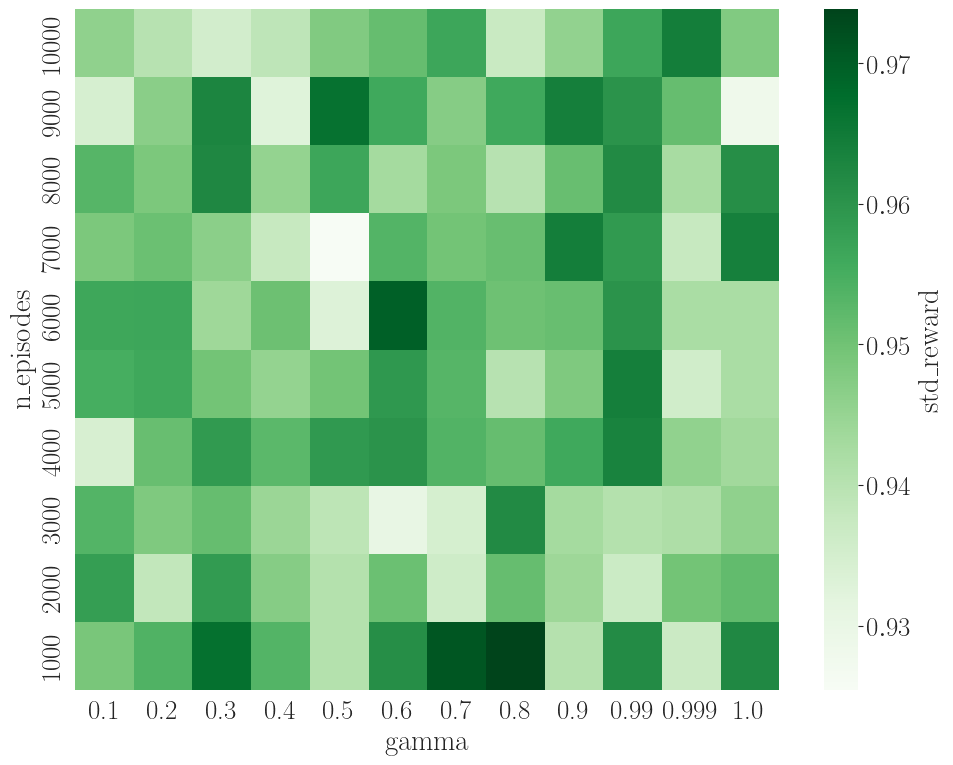

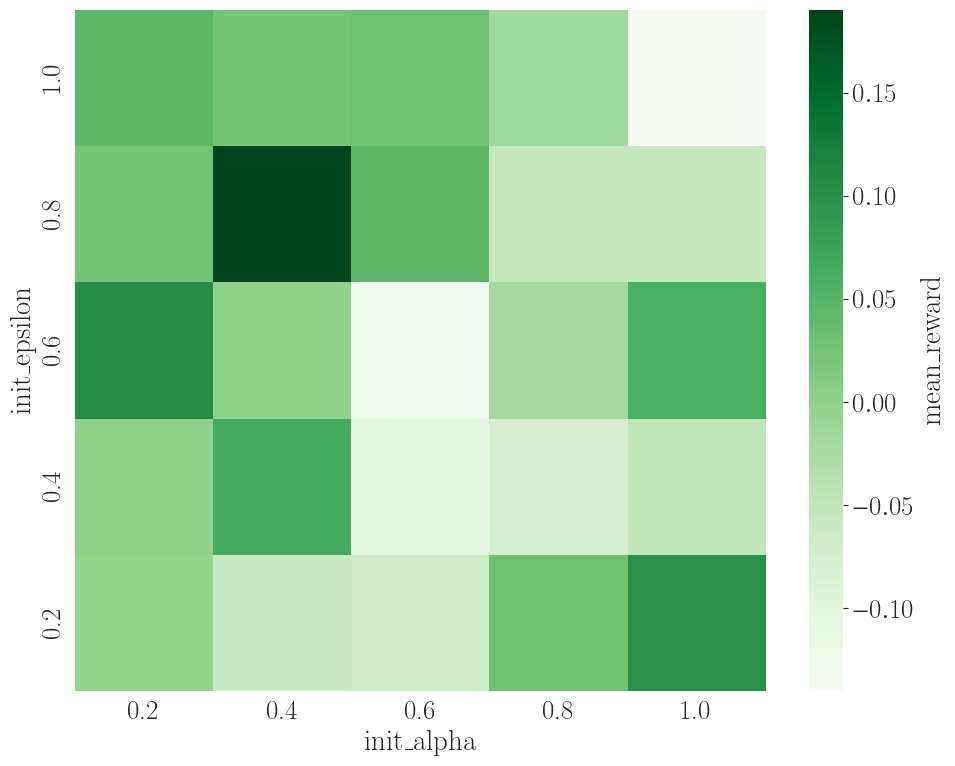

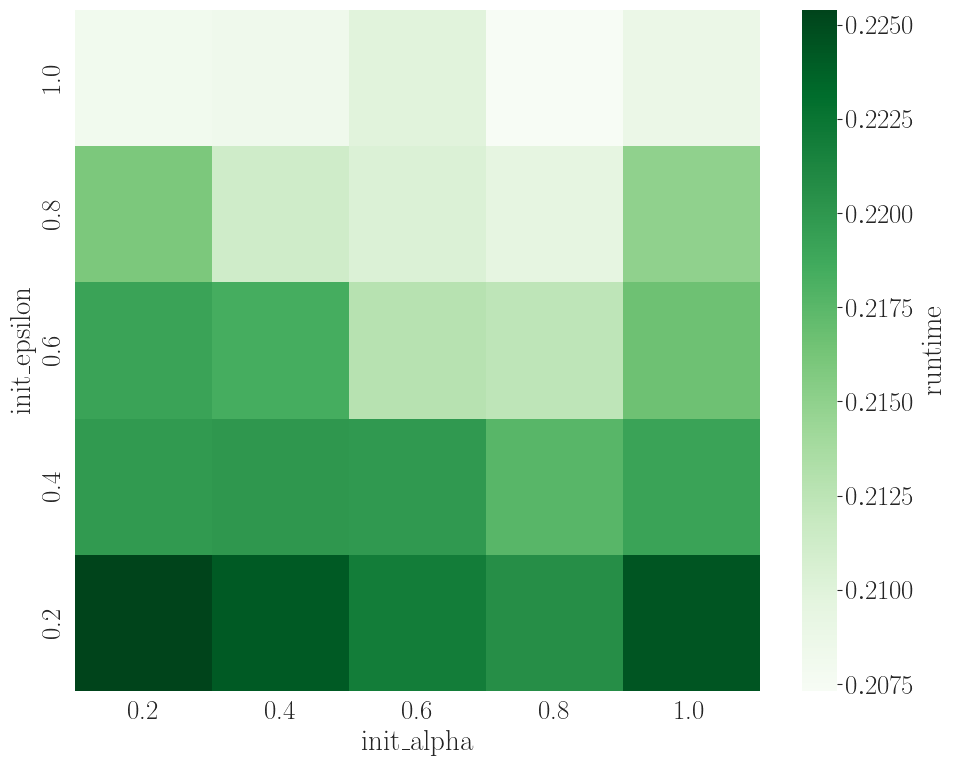

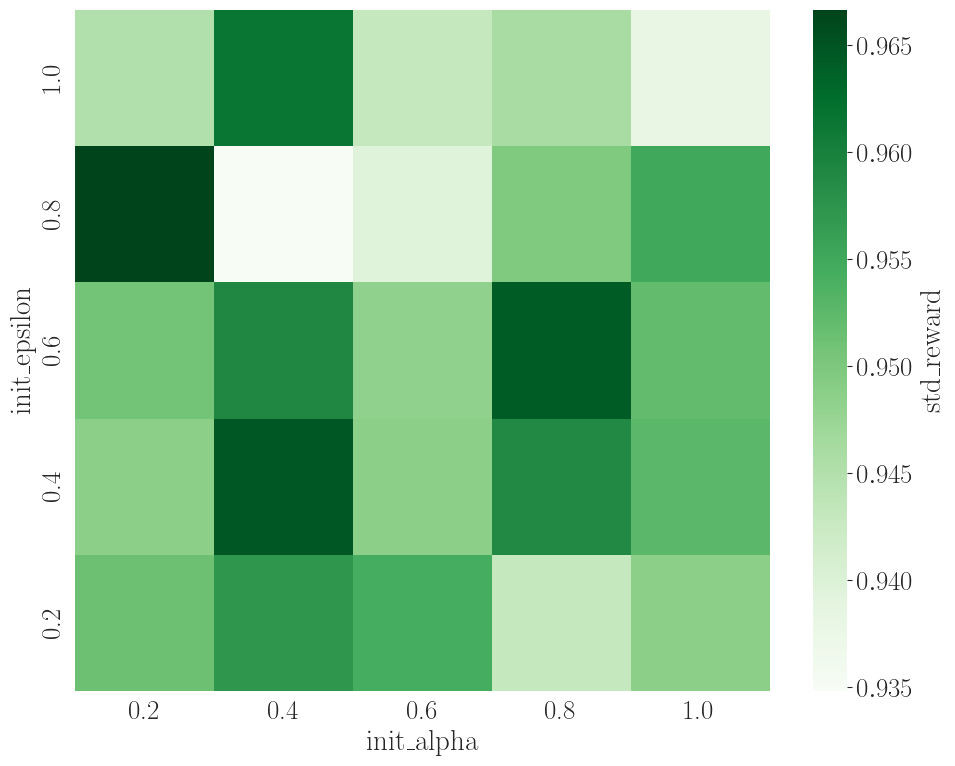

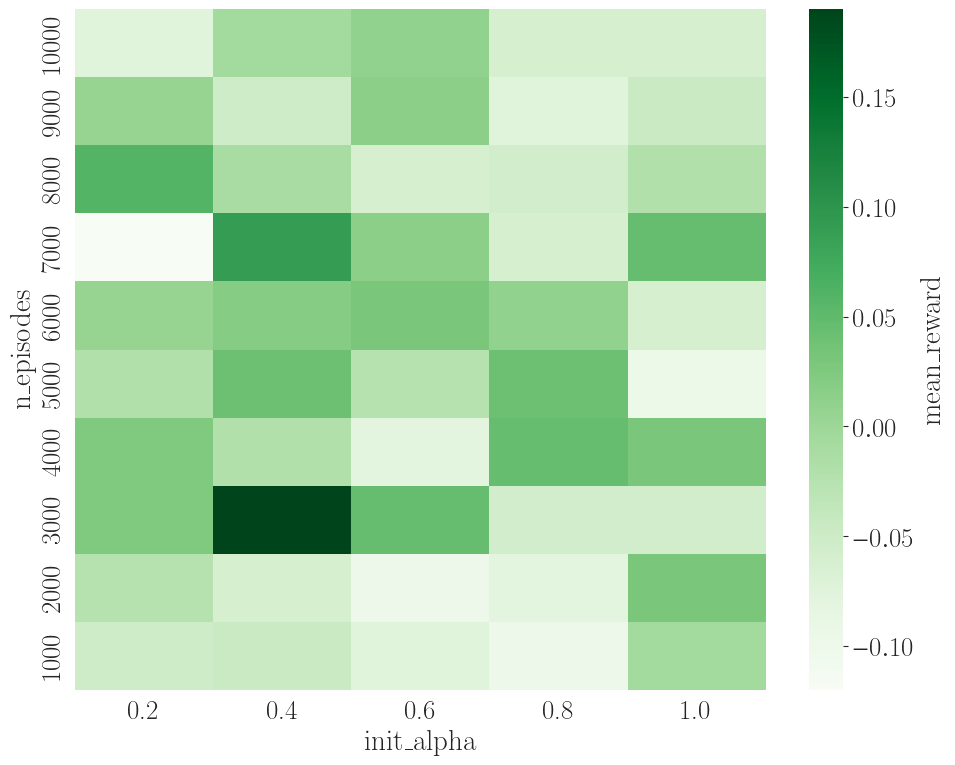

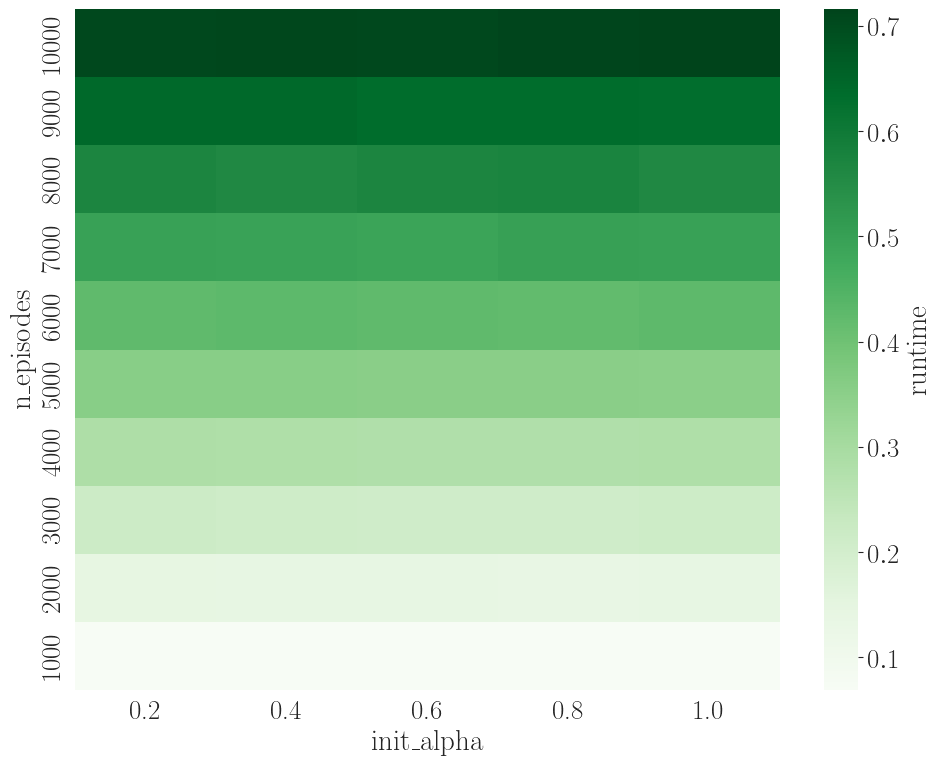

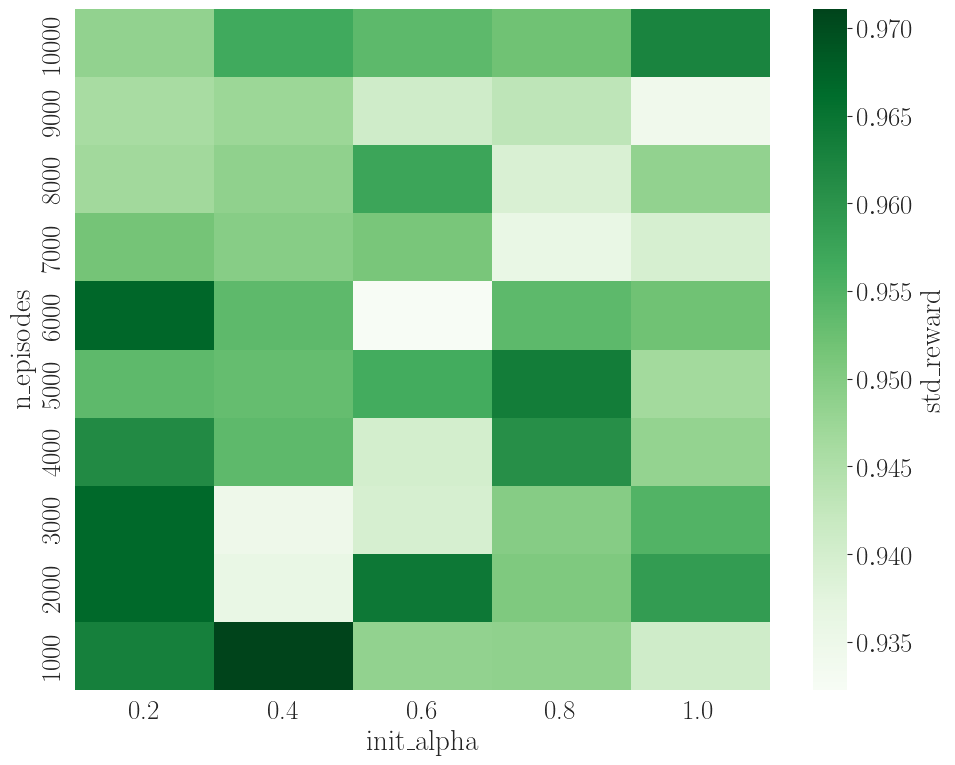

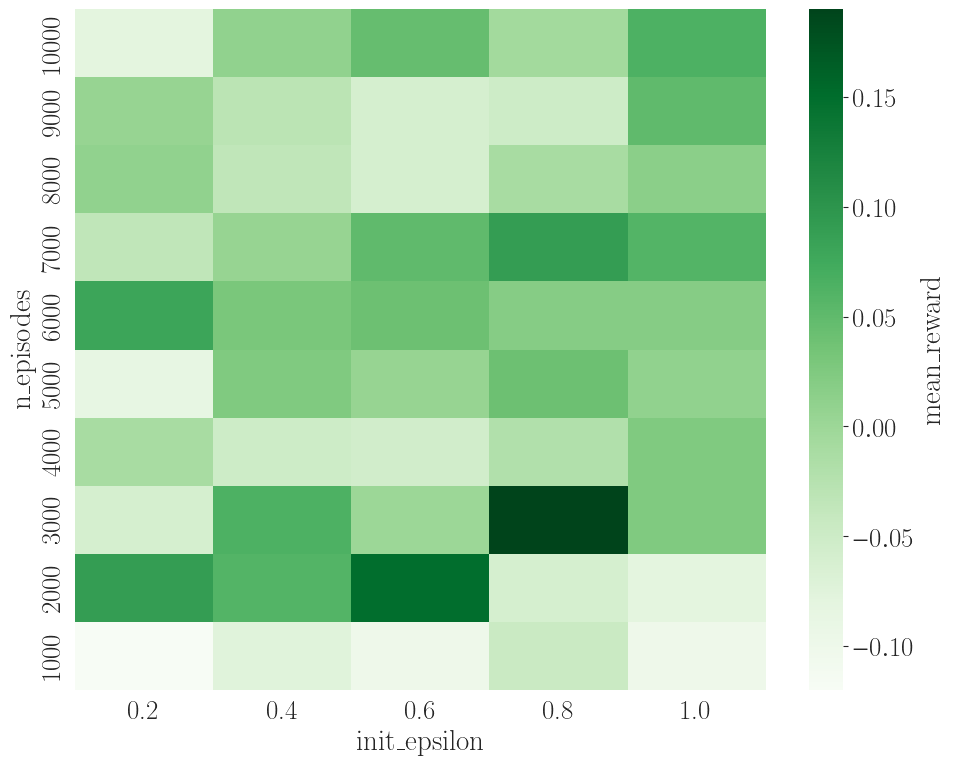

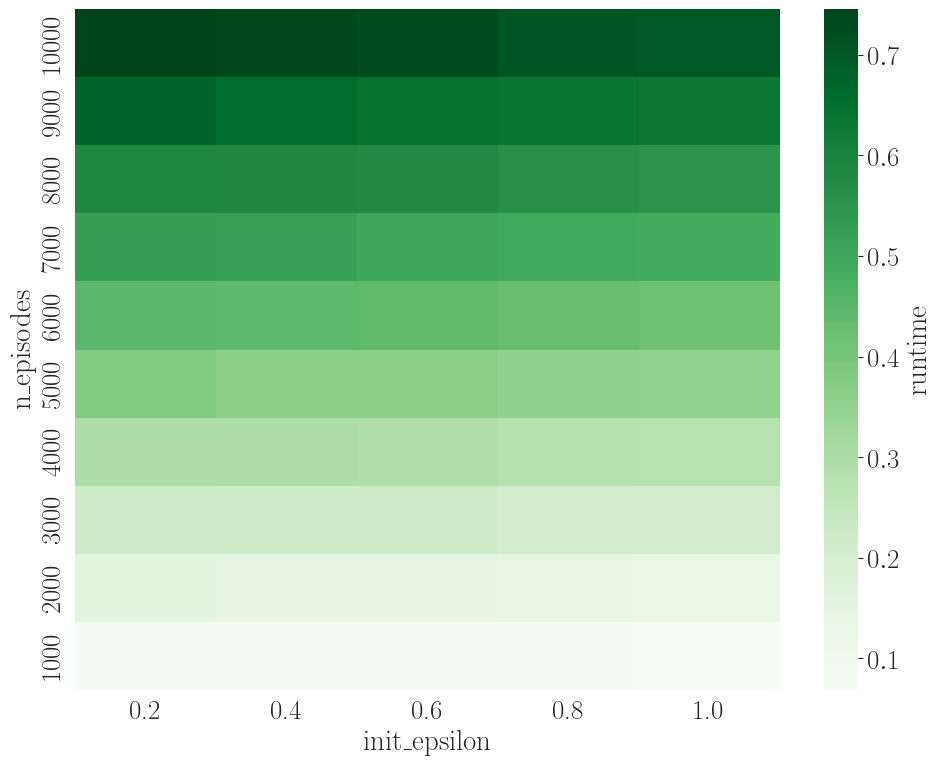

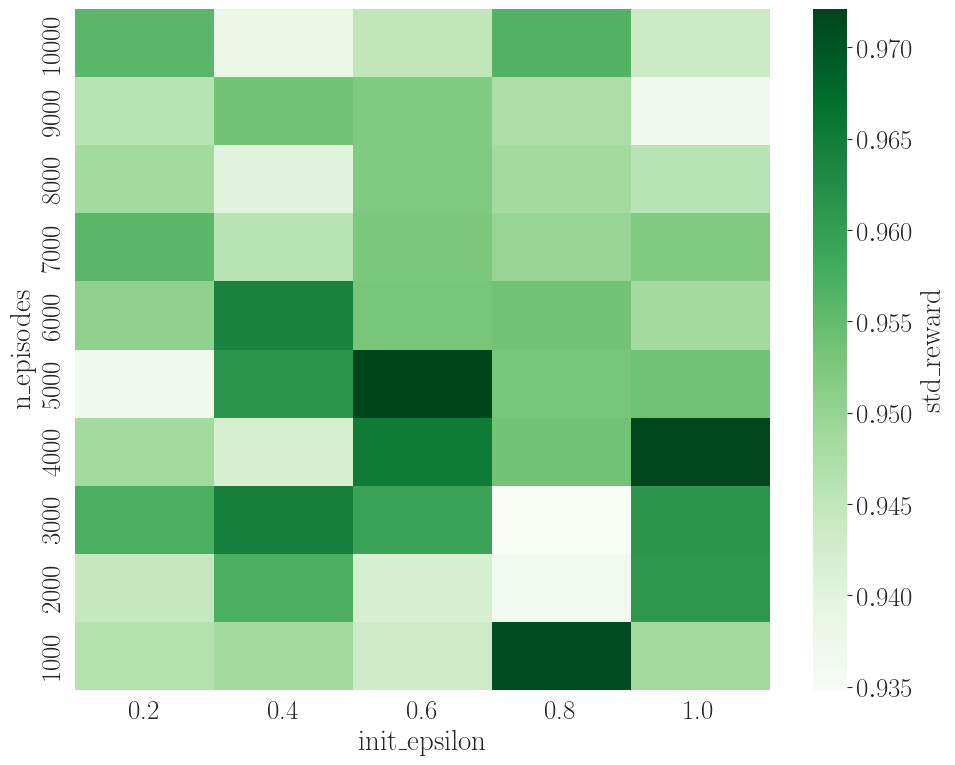

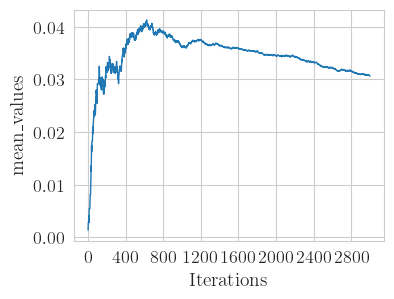

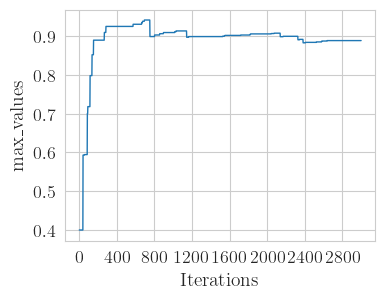

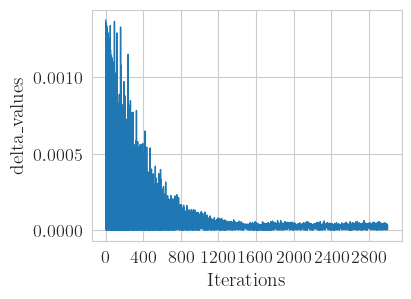

In [8]:
blackjack_exp = BlackjackExperiment(env_name='blackjack_200_less_combinations',
                                    result_dir='results',
                                    fig_dir='figs',
                                    random_seed =17)

params = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 0.99, 0.999, 1.0],
    'init_alpha': np.round(np.linspace(0.2, 1.0, 5), 1),
    'init_epsilon': np.round(np.linspace(0.2, 1.0, 5), 1),
    'n_episodes': np.linspace(1000, 10000, 10).astype(int)
}
blackjack_exp.run_q_learning_grid_search(params=params,
                                        test_iters=200,
                                        verbose=False,
                                        log_name='q_learning_grid_search_200')